# Problem Statment

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
sns.set(style="darkgrid", rc = {'figure.figsize':(12,5)})
import matplotlib.pyplot as plt
from pyforest import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## ***EDA Process***
### **1. Univariate Analysis - Single Variable Analysis.**


Two types of column : Numeric and Categorical

For Numeric : Histogram

For Categorical : Frequency Table / Countplot.



In [68]:
def plot_data(col):
    if train[col].dtypes != 'O':
        sns.distplot(train[col], color = random.choice(color))
        plt.xticks(rotation = 90)
        plt.show()
    else:
        sns.countplot(train[col])
        plt.xticks(rotation = 90)
        plt.show()

Item_Weight :

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

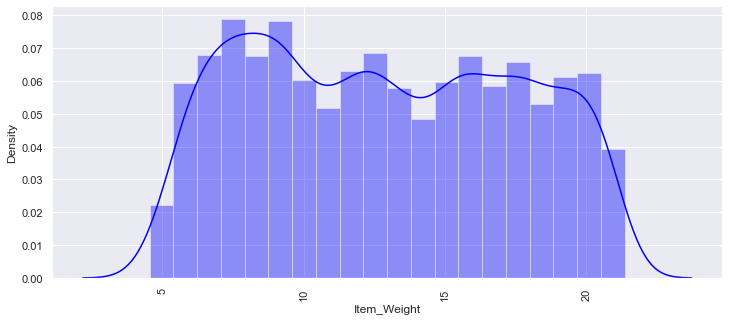

Item_Fat_Content :

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

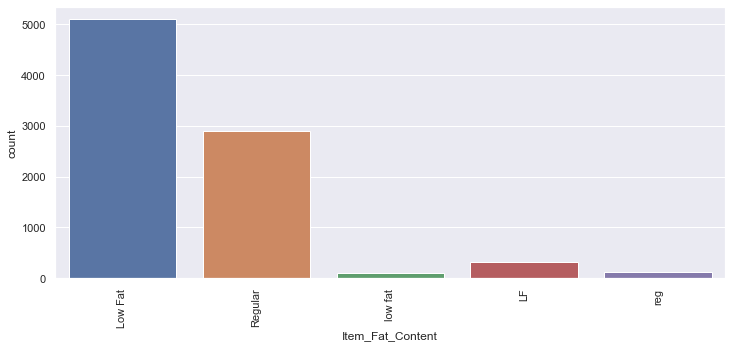

Item_Visibility :

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

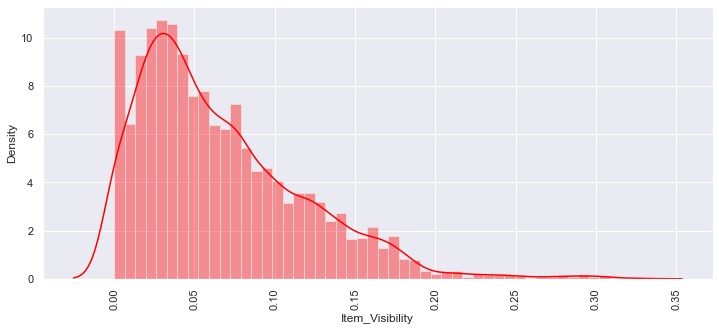

Item_Type :

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

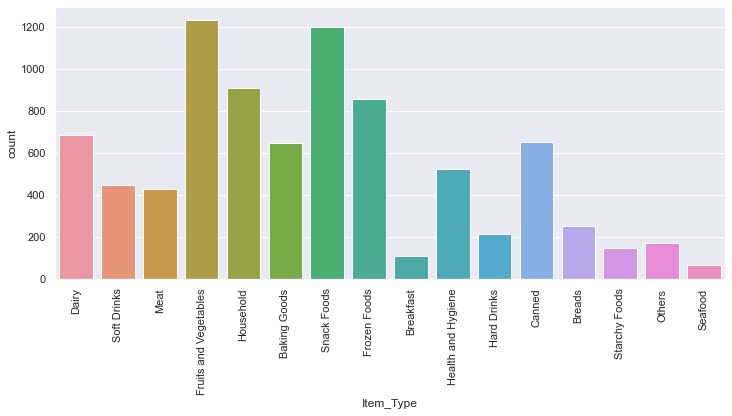

Item_MRP :

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

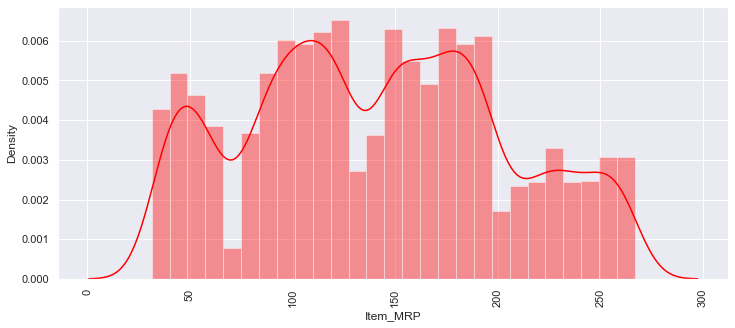

Outlet_Identifier :

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

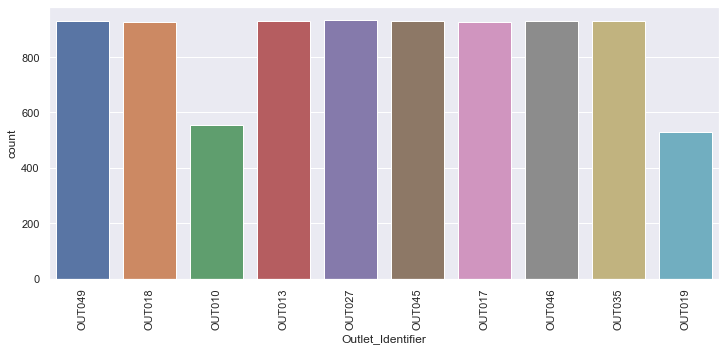

Outlet_Establishment_Year :

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

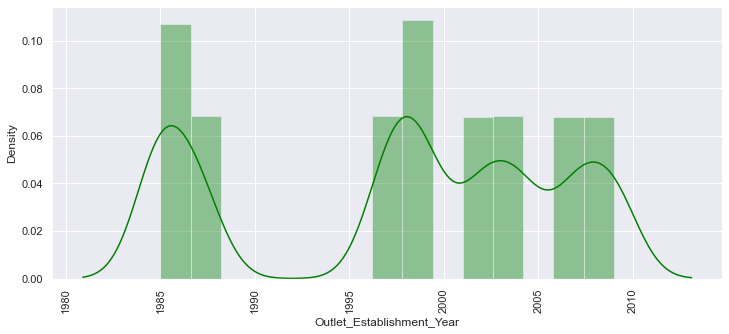

Outlet_Size :

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

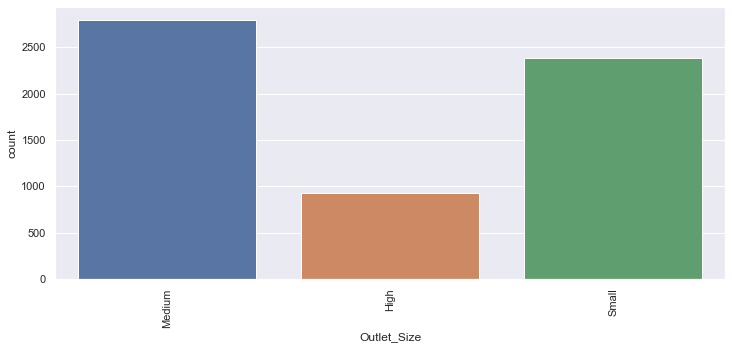

Outlet_Location_Type :

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

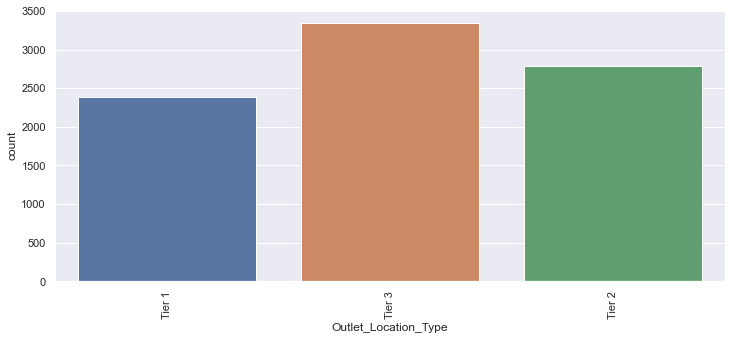

Outlet_Type :

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

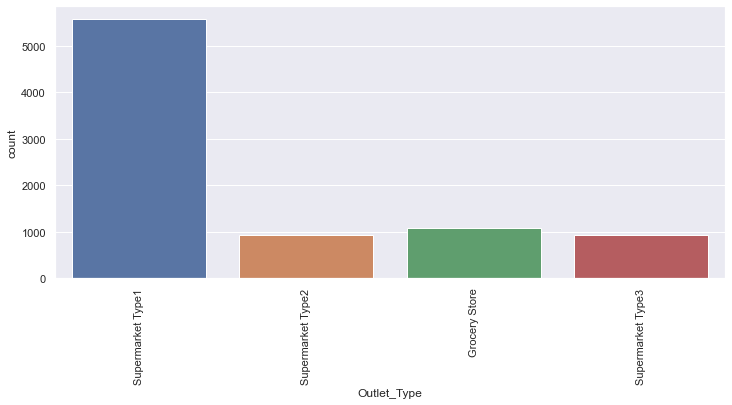

Item_Outlet_Sales :

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

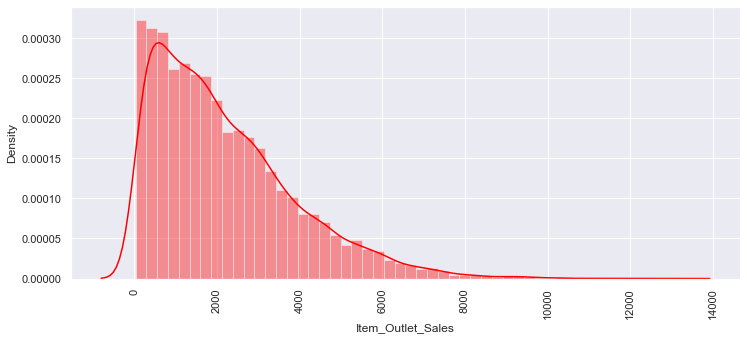

In [69]:
not_plot = ['Item_Identifier']
color = ['blue', 'red','green']

for i in train.columns:
    if i not in not_plot:
        print(i, ":", end = '')
        plot_data(i)     

In [70]:
# Correcting data in Item Fat Content
def correct_fat_content(df):
    df.Item_Fat_Content.replace(to_replace=['LF','low fat'], value = 'Low Fat', inplace=True)
    df.Item_Fat_Content.replace(to_replace=['reg'], value = 'Regular', inplace=True)
    print(df.Item_Fat_Content.value_counts())

correct_fat_content(train)

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

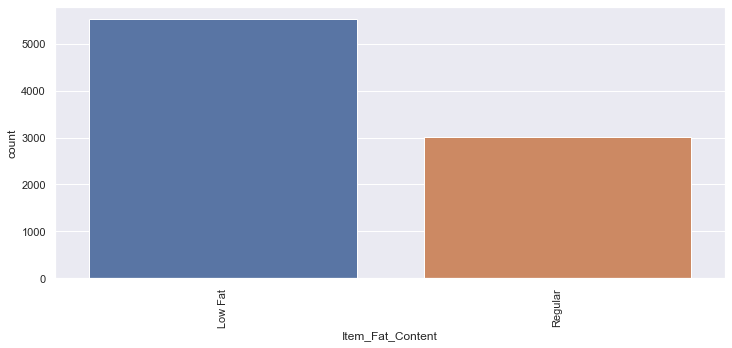

In [71]:
plot_data('Item_Fat_Content')

### **2. Bivariate Analysis - Two Variable Analysis.**


Numeric vs Numeric - Scatter Plot.

Numeric vs Categorical - Box Plot or Bar Plot.



In [72]:
def plot_2_data(x, y, df):
    if df[x].dtypes != 'O' and df[y].dtypes != 'O':
        sns.scatterplot(x = df[x], y = df[y], color = random.choice(color))
        plt.xticks(rotation = 90)
        plt.show()
    elif df[x].dtypes == 'O' and df[y].dtypes == 'O':
        sns.countplot(x = df[x], hue = df[y])
        plt.xticks(rotation = 90)
        plt.show()
    else:
        if df[x].dtypes == 'O':
            # print(df.groupby(df[x]).[y].describe().T)
            sns.boxplot(x = df[x], y = df[y])
            plt.xticks(rotation = 90)
            plt.show()
        elif df[y].dtypes == 'O':
            # print(df.groupby(df[y]).[x].describe().T)
            sns.boxplot(x = df[y], y = df[x])
            plt.xticks(rotation = 90)
            plt.show()
        else:
            # print(df.groupby(df[x]).df[y].describe().T)
            sns.countplot(x = df[i], hue = df[y])
            plt.xticks(rotation = 90)
            plt.show()

Item_Weight vs Item Outlet Sales:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

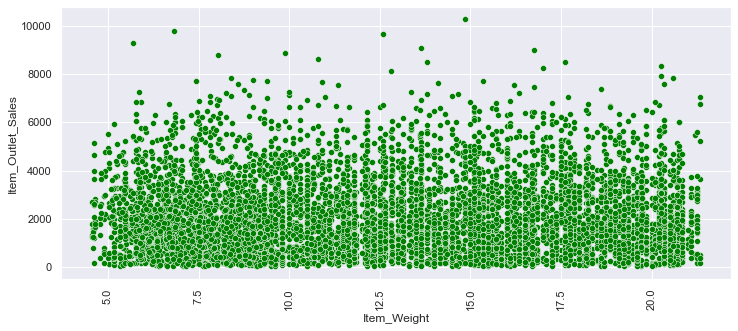

Item_Fat_Content vs Item Outlet Sales:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

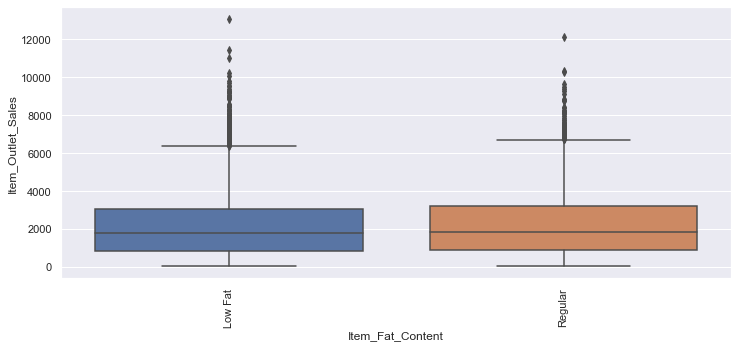

Item_Visibility vs Item Outlet Sales:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

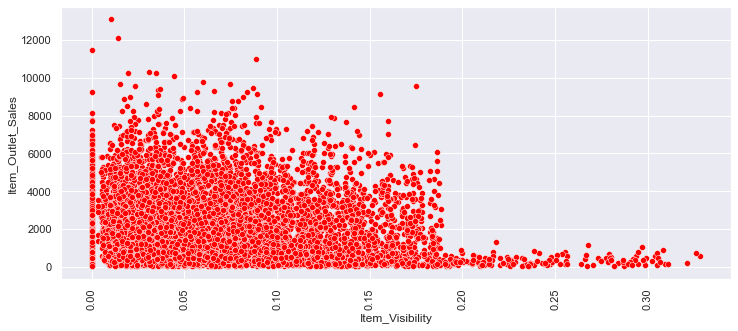

Item_Type vs Item Outlet Sales:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

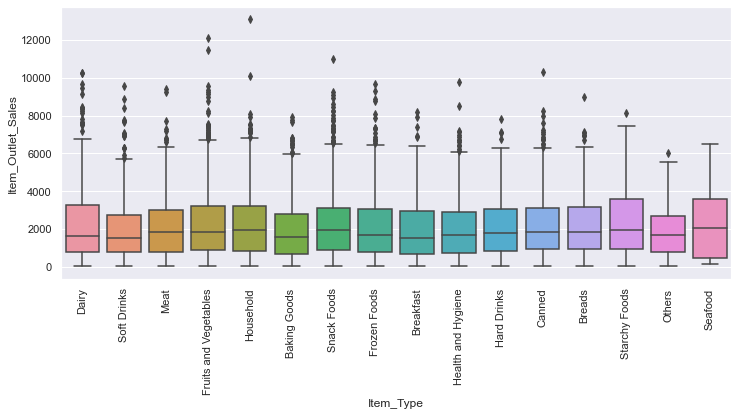

Item_MRP vs Item Outlet Sales:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

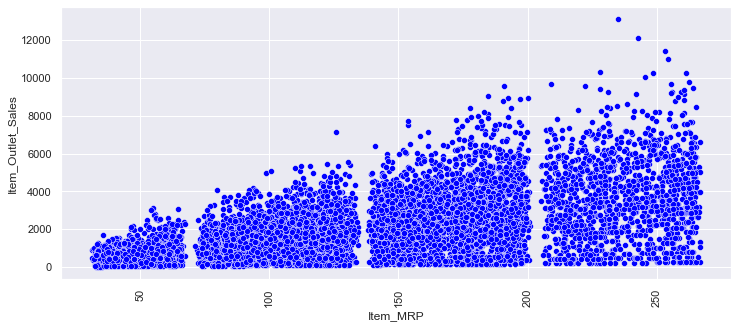

Outlet_Identifier vs Item Outlet Sales:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

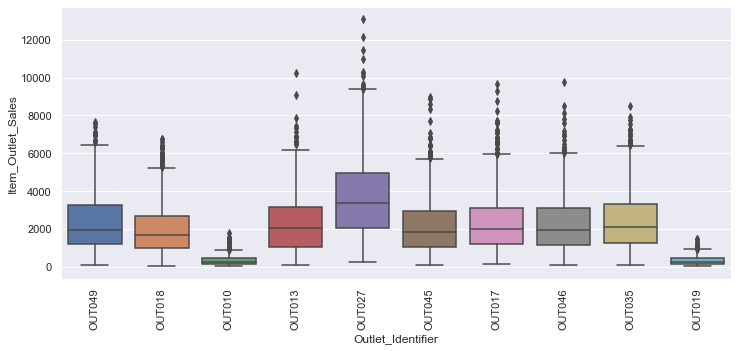

Outlet_Establishment_Year vs Item Outlet Sales:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

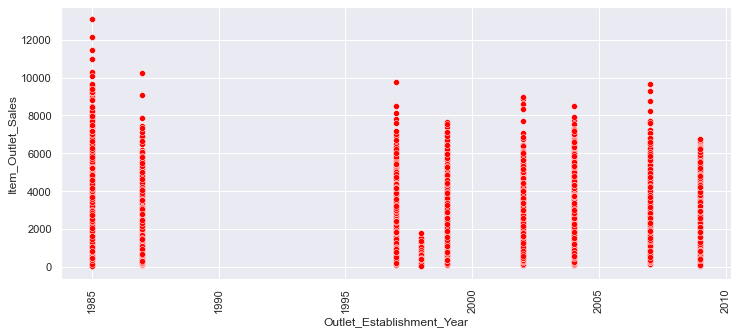

Outlet_Size vs Item Outlet Sales:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

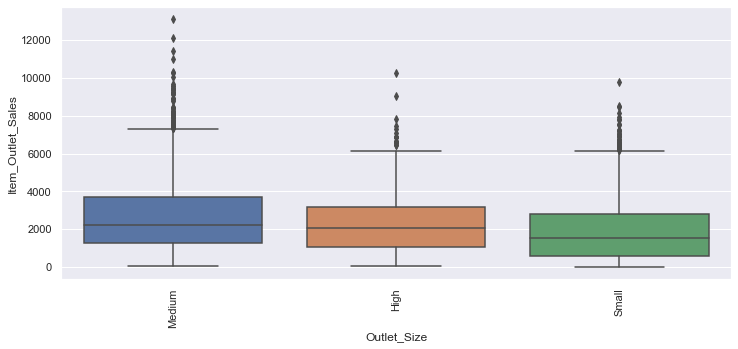

Outlet_Location_Type vs Item Outlet Sales:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

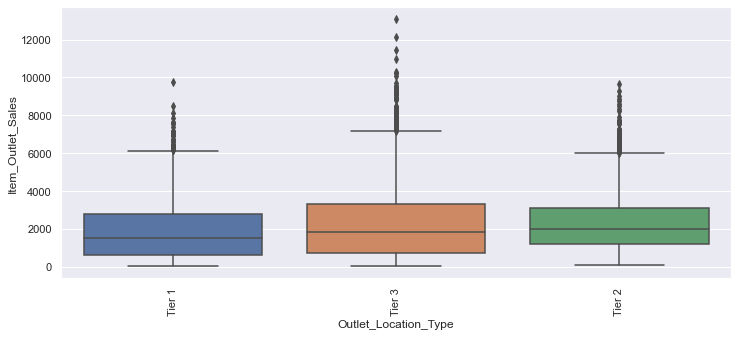

Outlet_Type vs Item Outlet Sales:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

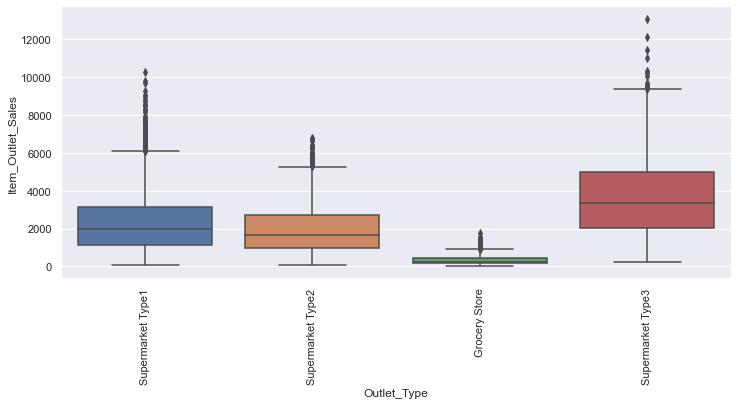

In [73]:
# Outlet_Sales is the Depemdent Variable

for i in test.columns:
    if i not in not_plot:
        print(i, "vs Item Outlet Sales:")
        plot_2_data(i, "Item_Outlet_Sales", train)

### **3. Missing Values.**

1. Drop NA : Not Correct approach (ignore lot of info).


> Note: Only good when more than 90 % values are missing.

2. Dealing with Missing Values - If column is numeric, then there are several approaches out of which we will discuss two.

> * Find the Descriptive statistics of
that column. If the values are skewed, then median is the best bet.

> * Try to find the pattern.


In [74]:
def chckmissval(x):
    print(x.isnull().sum()[x.isnull().sum() != 0])

In [75]:
# Lets combine the train and test dataset

combined = pd.concat([train, test], ignore_index=True, sort = False)
combined.shape

<IPython.core.display.Javascript object>

(14204, 12)

In [76]:
correct_fat_content(combined)

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [77]:
chckmissval(combined)

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64


In [78]:
print(combined.isnull().sum()[combined.isnull().sum() != 0].keys())

Index(['Item_Weight', 'Outlet_Size', 'Item_Outlet_Sales'], dtype='object')


Item_Weight and Outlet_Size have Null Values.

Lets deal with Item_Weight now.

In [79]:
combined[combined.Item_Weight.isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
14178,FDX32,NaN,Regular,0.099375,Fruits and Vegetables,143.6786,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
14179,FDC39,NaN,Low Fat,0.158425,Dairy,207.8296,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
14184,DRG37,NaN,Low Fat,0.000000,Soft Drinks,155.7972,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
14188,DRE03,NaN,Low Fat,0.024110,Dairy,46.0718,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


In [80]:
combined[combined.Item_Identifier == 'FDX39']['Item_Weight']

708      14.3
903      14.3
6062     14.3
6640      NaN
7001     14.3
9211     14.3
11806    14.3
12722    14.3
13290    14.3
Name: Item_Weight, dtype: float64

In [81]:
for i in combined.Item_Identifier.value_counts().keys():
    combined.loc[combined.Item_Identifier == i, 'Item_Weight'] = combined[combined.Item_Identifier == i]['Item_Weight'].mean()

In [82]:
chckmissval(combined)
# Item_Weight null values are dealt with.

Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64


Lets deal with Item_Outlet_Size now.

In [83]:
combined.Outlet_Identifier.value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [84]:
for i in combined.Outlet_Identifier.value_counts().keys():
    if combined[combined.Outlet_Identifier == i]['Outlet_Size'].isnull().sum() > 0:
        print(i, len(combined[combined.Outlet_Identifier == i]['Outlet_Size']), len(combined[combined.Outlet_Identifier == i]))

# ALl the values for these three outlets are null.

OUT045 1548 1548
OUT017 1543 1543
OUT010 925 925


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

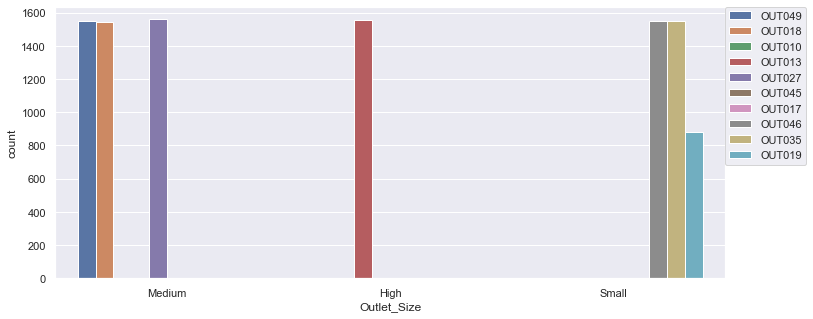

In [85]:
sns.countplot(x = 'Outlet_Size', hue = 'Outlet_Identifier', data = combined)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

In [86]:
combined.Outlet_Identifier.value_counts(ascending=True).index

Index(['OUT019', 'OUT010', 'OUT017', 'OUT018', 'OUT045', 'OUT049', 'OUT046',
       'OUT035', 'OUT013', 'OUT027'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

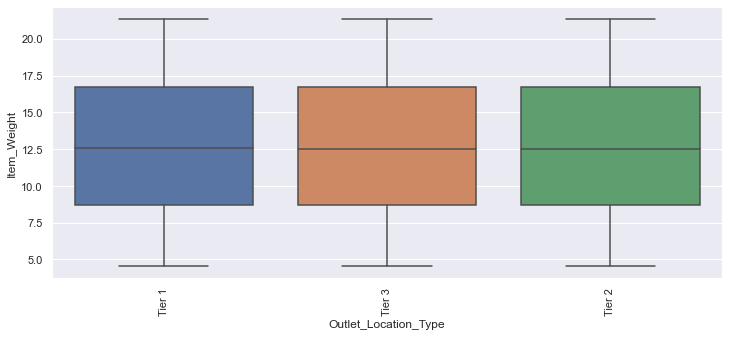

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

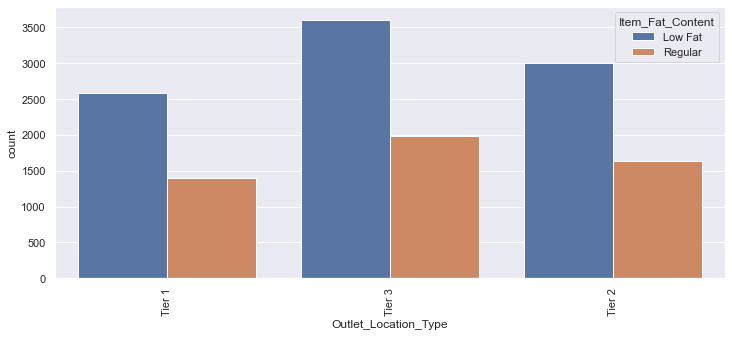

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

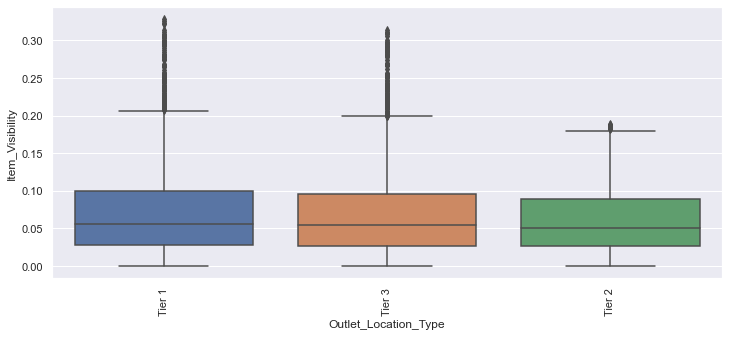

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

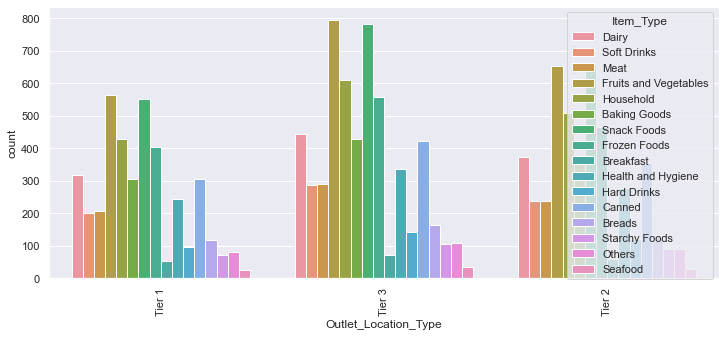

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

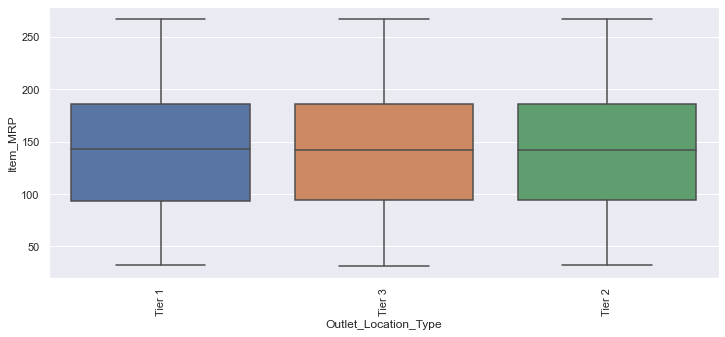

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

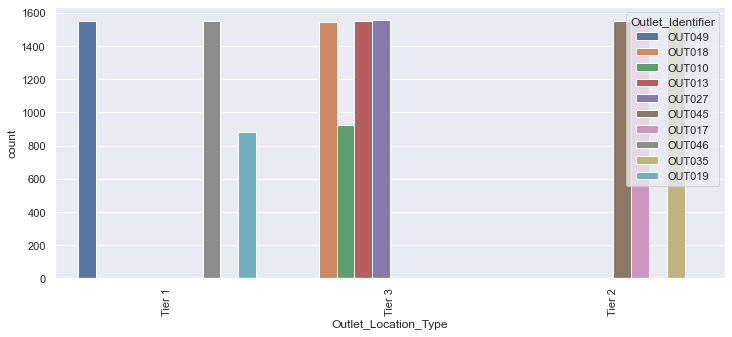

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

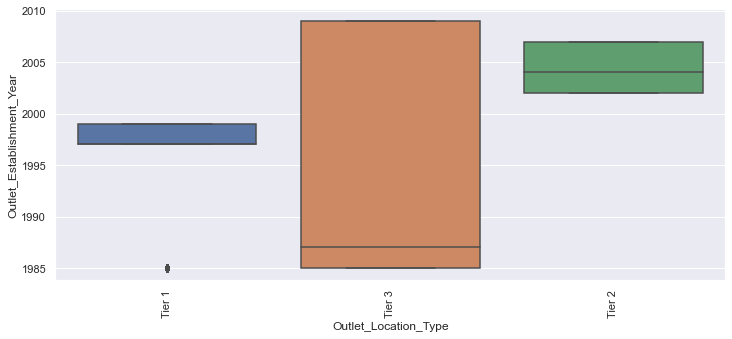

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

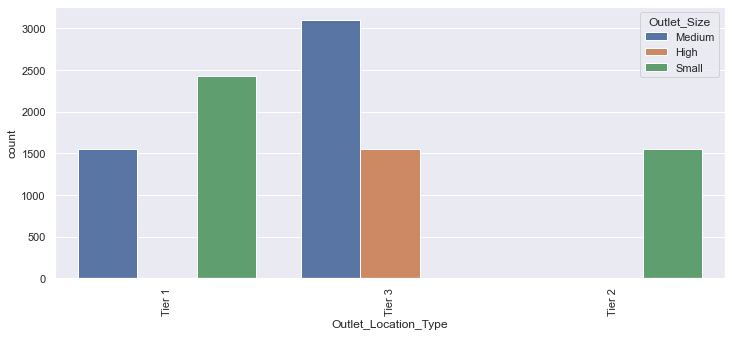

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

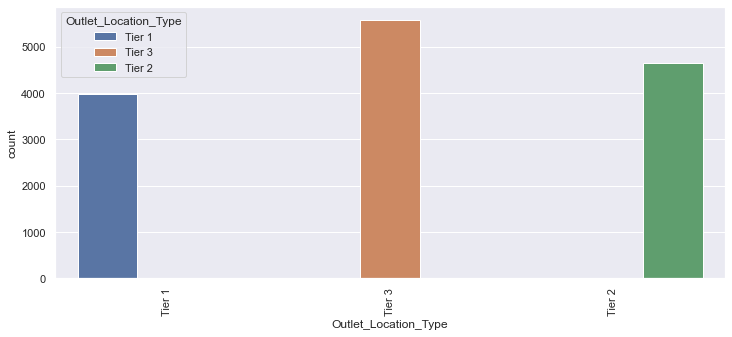

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

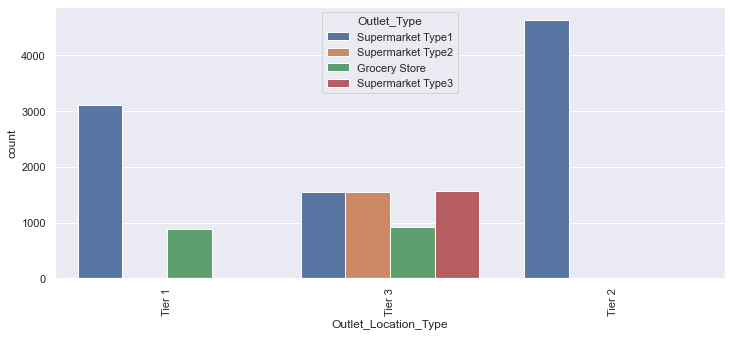

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

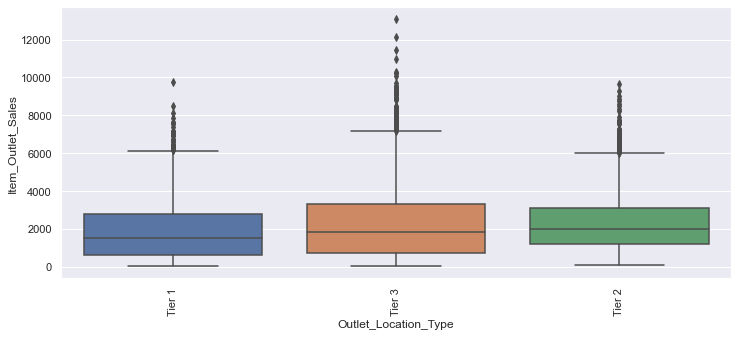

In [87]:
for i in combined.columns:
    if i not in not_plot:
        plot_2_data("Outlet_Location_Type", i, combined)

In [88]:
# Outlet 10 looks similar to Outlet 19

combined.loc[combined.Outlet_Identifier == 'OUT010', 'Outlet_Size'] = combined[combined.Outlet_Identifier == 'OUT019']['Outlet_Size'].values[0]

In [89]:
combined[combined.Outlet_Location_Type == 'Tier 2']['Outlet_Size'].isnull().sum()
#Outlet Size of Tier 2 Oultlets have null values

3091

In [90]:
combined[combined.Outlet_Location_Type == 'Tier 2']['Outlet_Size'].value_counts()

Small    1550
Name: Outlet_Size, dtype: int64

In [91]:
# Filling all Tier 2 null values as Small
combined.loc[combined.Outlet_Location_Type == 'Tier 2', "Outlet_Size"] = "Small"

In [92]:
chckmissval(combined)

Item_Outlet_Sales    5681
dtype: int64


### **4. Feature Engineering.**

In [93]:
# Price per unit

combined['Item_PPU'] = combined.Item_MRP / combined.Item_Weight
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_PPU
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,9.484115
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512


In [94]:
# Perishable / Non-Perishable
combined.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [95]:
lst_eat = ['Dairy', 'Meat', 'Fruits and Vegetables', 'Breakfast', 'Breads', 'Seafood']
def eatable(x):
    if x in lst_eat:
        return "Perishables"
    else:
        return "Non-Perishables"
combined['Item_Cat'] = combined.Item_Type.apply(eatable)
combined.Item_Cat.head()

0        Perishables
1    Non-Perishables
2        Perishables
3        Perishables
4    Non-Perishables
Name: Item_Cat, dtype: object

In [96]:
# Outlet Age (No of years the outlet was there)
combined['Outlet_Age'] = 2021 - combined.Outlet_Establishment_Year
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_PPU,Item_Cat,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204,Perishables,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581,Non-Perishables,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457,Perishables,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,9.484115,Perishables,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512,Non-Perishables,34


In [97]:
# Item Identifiers
combined.Item_Identifier.value_counts()

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [98]:
combined['Item_ID'] = combined.Item_Identifier.str[0:2]

In [99]:
combined.drop(['Item_Identifier', 'Item_Type', 'Outlet_Establishment_Year', 'Item_MRP'], axis = 1, inplace=True)

In [100]:
combined.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_PPU,Item_Cat,Outlet_Age,Item_ID
0,9.30,Low Fat,0.016047,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204,Perishables,22,FD
1,5.92,Regular,0.019278,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,8.153581,Non-Perishables,12,DR
2,17.50,Low Fat,0.016760,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457,Perishables,22,FD
3,19.20,Regular,0.000000,OUT010,Small,Tier 3,Grocery Store,732.3800,9.484115,Perishables,23,FD
4,8.93,Low Fat,0.000000,OUT013,High,Tier 3,Supermarket Type1,994.7052,6.031512,Non-Perishables,34,NC


In [101]:
# DataFrame without Visibilty 0 values.

combined = combined.loc[combined.Item_Visibility != 0]
# print(combined_2.shape)
print(combined.shape)

(13325, 12)


In [102]:
chckmissval(combined)

Item_Outlet_Sales    5328
dtype: int64


In [103]:
# combined.to_csv("combined.csv", index=False)

In [104]:
train_data = combined[combined['Item_Outlet_Sales'].notnull()]
test_data = combined[combined['Item_Outlet_Sales'].isnull()]

In [105]:
x = train_data.loc[:, train_data.columns != 'Item_Outlet_Sales']
y = train_data.loc[:, 'Item_Outlet_Sales']

x_pred = test_data.loc[:, test_data.columns != 'Item_Outlet_Sales']
y_pred = test_data.loc[:, 'Item_Outlet_Sales']

In [106]:
# Creating Validation Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)

In [107]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_train = x_train.apply(le.fit_transform)
x_test = x_test.apply(le.fit_transform)

In [108]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [109]:
from sklearn.metrics import mean_squared_error as mse, r2_score
import math 
def get_metrics(x):
    print("RMSE:", math.sqrt(mse(y_test, x)))
    print("R2 Score:", r2_score(y_test, x))

In [110]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, max_features = 'sqrt', max_depth = 2, random_state = 0).fit(x_train, y_train)
pred_rand_for = rf.predict(x_test)
# to_sub_file(prediction)
get_metrics(pred_rand_for)

RMSE: 1514.602146048964
R2 Score: 0.22742909441430592


In [111]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
dec = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
dec.fit(x_train, y_train)

pred_dec_tree = dec.predict(x_test)

get_metrics(pred_dec_tree)

RMSE: 1929.9340611969194
R2 Score: -0.25437143415082253


In [112]:
from sklearn.linear_model import LinearRegression
le = LinearRegression()
le.fit(x_train, y_train)
le_pred = le.predict(x_test)
get_metrics(le_pred)

RMSE: 1858.0159753914263
R2 Score: -0.16262618703377285


In [113]:
from sklearn.svm import SVR
svm_mod = SVR(kernel = 'rbf')
svm_mod.fit(x_train, y_train)
svm_pred = svm_mod.predict(x_test)
get_metrics(svm_pred)

RMSE: 1737.8293555317969
R2 Score: -0.017080836137209898


In [114]:
# from sklearn.preprocessing import PolynomialFeatures
 
# poly = PolynomialFeatures(degree = 4)
# x_poly = poly.fit_transform(x_train)
 
# poly.fit(x_poly, y_train)
# lin2 = LinearRegression()
# lin2.fit(x_train, y_train)
# poly_pred = lin2.predict(poly.fit_transform(x_test))
# get_metrics(poly_pred)

In [115]:
def to_sub_file(x):
    ans = pd.read_csv('sample_submission_1.csv')
    ans.loc[:, 'Item_Outlet_Sales'] = x
    ans.to_csv("sample_submission_1.csv", index=False)